In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [2]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing import image

In [3]:
train_Image_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range =0.2,
                                  zoom_range=0.2)

In [4]:
val_Image_datagen = ImageDataGenerator(rescale=1./255)

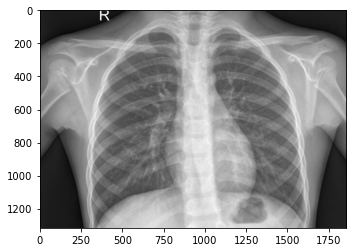

In [5]:
import cv2
img = cv2.imread(r"test\NORMAL\IM-0001-0001.jpeg")
plt.imshow(img)
plt.show()

In [11]:
training_set = train_Image_datagen.flow_from_directory(r"train",
                                               batch_size =16,
                                               target_size=(150,150))

Found 5216 images belonging to 2 classes.


In [12]:
validation_set = val_Image_datagen.flow_from_directory(r"test",
                                               batch_size =16,
                                               target_size=(150,150))

Found 624 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))

In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 165888)            0         
_________________________________________________________________
dropout (Dropout)            (None, 165888)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [13]:
history = model.fit(training_set,validation_data=validation_set,epochs=10,batch_size=16)

Epoch 1/10
326/326 [==============================] - 161s 493ms/step - loss: 0.4875 - accuracy: 0.7910 - val_loss: 0.5797 - val_accuracy: 0.7500
Epoch 2/10
326/326 [==============================] - 133s 409ms/step - loss: 0.3183 - accuracy: 0.8850 - val_loss: 0.7547 - val_accuracy: 0.7356
Epoch 3/10
326/326 [==============================] - 130s 400ms/step - loss: 0.2849 - accuracy: 0.8961 - val_loss: 0.4059 - val_accuracy: 0.8846
Epoch 4/10
326/326 [==============================] - 126s 385ms/step - loss: 0.2691 - accuracy: 0.8959 - val_loss: 0.5016 - val_accuracy: 0.8397
Epoch 5/10
326/326 [==============================] - 123s 378ms/step - loss: 0.2662 - accuracy: 0.9087 - val_loss: 0.3874 - val_accuracy: 0.8878
Epoch 6/10
326/326 [==============================] - 121s 372ms/step - loss: 0.2331 - accuracy: 0.9160 - val_loss: 0.5878 - val_accuracy: 0.8237
Epoch 7/10
326/326 [==============================] - 122s 375ms/step - loss: 0.2120 - accuracy: 0.9204 - val_loss: 0.7342 -

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory("test1",
        target_size=(150,150),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

Found 1 images belonging to 1 classes.


In [26]:
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)

In [27]:
print(np.argmax(predict))

1


In [28]:
model.save('chest_xray.h5')